<a href="https://colab.research.google.com/github/Minecka2023/npm_Minetska_3-14/blob/main/LB8_Minetska_fit_3_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
# Задані точки
x = np.array([0.5, 0.9, 1.5, 2.3, 3])
y = np.array([1.54, 3.38, 2.53, 1.86, 4.35])
n = len(x) - 1
h = np.diff(x)
a = y
b = np.zeros(n)
d = np.zeros(n)
c = np.zeros(n)
alpha = np.zeros(n)
for i in range(1, n):
 alpha[i] = (3 / h[i]) * (a[i+1] - a[i]) - (3 / h[i-1]) * (a[i] - a[i-1])
l = np.ones(n)
mu = np.zeros(n)
z = np.zeros(n)
for i in range(1, n):
 l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
 mu[i] = h[i] / l[i]
 z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]
# Виправлення обчислення коефіцієнтів для останнього відрізка
#c[n-1] = 0
c[n-1] = (alpha[n-1] - h[n-2] * z[n-2]) / (2 * (h[n-2] + mu[n-1]))
b[n-1] = (a[n] - a[n-1]) / h[n-1] - h[n-1] * (2 * c[n-1] + c[n-2]) / 3
d[n-1] = (c[n-1] - c[n-2]) / (3 * h[n-1])
for j in range(n - 2, -1, -1):
 c[j] = z[j] - mu[j] * c[j+1]
 b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
 d[j] = (c[j+1] - c[j]) / (3 * h[j])
# Виведення аналітичного вигляду кубічного сплайна для кожного відрізка
for i in range(n):
    print(f"Відрізок {i+1}:")
    print(f"S_{i}(x) = {a[i]} + {b[i].round(4)}(x - {x[i]}) + {c[i].round(4)}(x - {x[i]})^2 + {d[i].round(4)}(x - {x[i]})^3, x належить [{x[i]}, {x[i+1]}]")


Відрізок 1:
S_0(x) = 1.54 + 5.8488(x - 0.5) + 0.0(x - 0.5)^2 + -7.805(x - 0.5)^3, x належить [0.5, 0.9]
Відрізок 2:
S_1(x) = 3.38 + 2.1024(x - 0.9) + -9.366(x - 0.9)^2 + 5.8348(x - 0.9)^3, x належить [0.9, 1.5]
Відрізок 3:
S_2(x) = 2.53 + -2.8352(x - 1.5) + 1.1366(x - 1.5)^2 + 1.7006(x - 1.5)^3, x належить [1.5, 2.3]
Відрізок 4:
S_3(x) = 1.86 + 1.122(x - 2.3) + 5.2181(x - 2.3)^2 + 2.4848(x - 2.3)^3, x належить [2.3, 3.0]


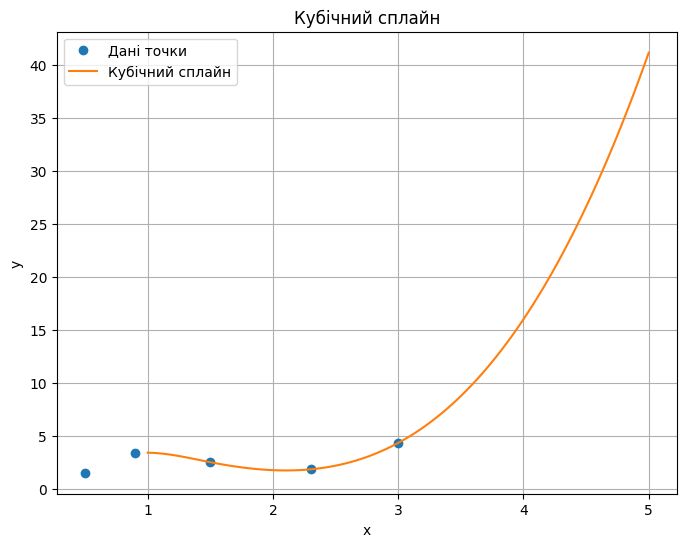

In [4]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# Вхідні дані (x та y - координати точок)
x = np.array([0.5, 0.9, 1.5, 2.3, 3])
y = np.array([1.54, 3.38, 2.53, 1.86, 4.35])

# Побудова кубічного сплайна
cs = CubicSpline(x, y)

# Генерація більшої кількості точок для плавного графіку сплайна
x_new = np.linspace(1, 5, 100)
y_new = cs(x_new)

# Відображення результатів
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Дані точки')
plt.plot(x_new, y_new, label='Кубічний сплайн')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубічний сплайн')
plt.grid(True)
plt.show()
